In [3]:
import numpy as np
import pandas as pd
import math

## DataFrame

A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

DataFrame documentation : https://pandas.pydata.org/docs/reference/frame.html

## Read csv file as DataFrame

In [4]:
customerData = pd.read_csv('customer_data.csv')

### Displaying the first rows

In [5]:
customerData.head()

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


we can see that the dataframe has 3 columns.
we will consider age and salary columns as inputs 
and purchased as output

### Data processing and feature scaling

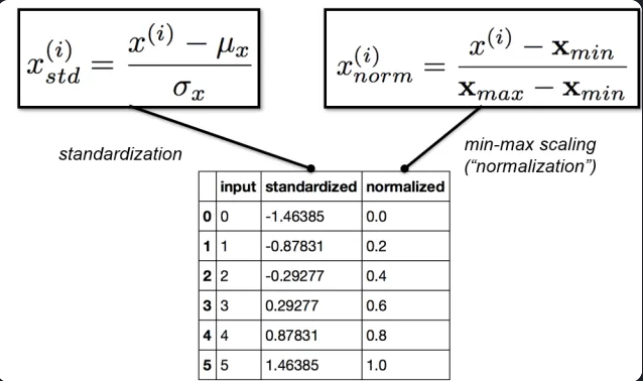

we use normalization when the data distribution is unknown or the data doesn't have Gaussian Distribution. 

standardized data is usually applied when the data has a bell curve

**in our case we are using normalization**

In [6]:
# shuffle the data
customerData.sample(frac=1)
# print(customerData)


# X => values of features 1,2 (age, salary) & Y => values of output (purchased)
X = customerData.iloc[:, 0:2].values
Y = customerData.iloc[:, 2:3].values

# Feature Scaling using minmax normalization
X0_temp = []
X1_temp = []
for i in X:
    X0_temp.append(i[0])
    X1_temp.append(i[1])
minVal = min(X0_temp)
maxVal = max(X0_temp)
for i in range(len(X0_temp)):
    X0_temp[i] = (X0_temp[i] - minVal) / (maxVal - minVal)

minVal = min(X1_temp)
maxVal = max(X1_temp)
for i in range(len(X1_temp)):
    X1_temp[i] = (X1_temp[i] - minVal) / (maxVal - minVal)

X = X.astype(float)
for i in range(len(X)):
    X[i][0] = (X0_temp[i])
    X[i][1] = (X1_temp[i])

# Split the dataset into training and testing sets (req2)
X_Train = X[0:320]
Y_Train = Y[0:320]
X_Test = X[320:]
Y_Test = Y[320:]
numOfTrainingItems = int(X_Train.size / 2)

### Model functions  (to modify)

In [7]:
Y_Train.shape

(320, 1)

In [8]:
X_Train.shape

(320, 2)

In [9]:
class LogisticRegression:
    # Z = X*w+b => h(x)
    def __init__(self, x_train, y_train, w, b, numOfTrainingItems, learning_rate,epochs):
        self.x_train = x_train
        self.y_train = y_train
        self.w = w
        self.b = b
        self.numOfTrainingItems = numOfTrainingItems
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Sigmoid Function (Z = w*X+b) .. w=theta1 , b=theta0
    def Sigmoid(self, w, x, b):
        z = np.dot(x, w) + b
        return 1 / (1 + np.e ** -z)

    # Cost Function 
    def Cost_Function(self):
        cost0 = self.y_train.T.dot(np.log(self.Sigmoid(self.w, self.x_train, self.b)))
        cost1 = (1-self.y_train).T.dot(np.log(1-self.Sigmoid(self.w, self.x_train, self.b)))
        cost = -((cost1 + cost0))/len(self.y_train) 

        return cost

    # get the values of w,b by gradient descent
    def gradient_descent(self):
        hypothesis = self.Sigmoid(self.w, self.x_train, self.b)
        self.w = self.w + (self.learning_rate * (np.dot(self.x_train.T, self.y_train - hypothesis)) / numOfTrainingItems)
        self.b = self.b +(self.learning_rate * (np.sum(self.y_train - hypothesis)) / numOfTrainingItems)
        return [self.w, self.b]


    
    # training the data
    def train(self):
        for i in range(self.epochs):
            self.w, self.b , = self.gradient_descent()
        #self.w, self.b = self.backpropagation()
        return [self.w, self.b]

    # predict new values
    def predict(self, x_test):
        hypothesis = self.Sigmoid(self.w, x_test, self.b)
        return [1 if val >= 0.5 else 0 for val in hypothesis]

## initializing weights and biases

In [10]:
# random initial values for w and b
w = np.random.random((2, 1))
b = np.random.random()

## set the learning rate and number of epochs

In [11]:
alpha = 0.03
epochs = 1000

### Create the model 

In [12]:
LogisticReg = LogisticRegression(X_Train, Y_Train, w, b, numOfTrainingItems, alpha, epochs)

### Train the model

In [13]:
w, b= LogisticReg.train()

### Predict

In [14]:
Y_Predict = LogisticReg.predict(X_Test)

## Metrics (to modify)

In [15]:
def metrics(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
            
    accuracy = (tp + tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score,accuracy,precision, recall

In [16]:
f1_score,accuracy, precision, recall  = metrics(Y_Test,Y_Predict)
print(f"Accuracy : {accuracy * 100}%")
print(f"f1_score : {f1_score * 100}%")
print(f"precision : {precision * 100}%")
print(f"recall : {recall * 100}%")

Accuracy : 75.0%
f1_score : 52.38095238095239%
precision : 91.66666666666666%
recall : 36.666666666666664%


In [17]:
#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X_Train, Y_Train)

c:\users\ali\workshop\env\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
Y_Predict_sklearn = clf.predict(X_Test)

In [19]:
f1_score,accuracy, precision, recall  = metrics(Y_Test,Y_Predict_sklearn)
print(f"Accuracy : {accuracy * 100}%")
print(f"f1_score : {f1_score * 100}%")
print(f"precision : {precision * 100}%")
print(f"recall : {recall * 100}%")

Accuracy : 86.25%
f1_score : 78.43137254901961%
precision : 95.23809523809523%
recall : 66.66666666666666%
